# Assignment 10

Take the small earthquake data.
https://vincentarelbundock.github.io/Rdatasets/csv/datasets/quakes.csv
Use Delaunay, Voronoi and convex-hulls to determine where you would like to stay at your vacation in the rectangle that is a bounding box of long lat coordinates found in the dataset.
Let us assume that you want to stay as far from the quakes as possible. Let us also assume that the region seen in the data is dry land. You also may assume that depth of the quake does not matter.
If you are able to put the coordinates to the map, you may also do that but that is not required.
Plan a route between the east and west border of the picture so that the risk of earth quake is minimum. We may assume that risk is proportional to the previous quakes. Find a way to mark the safe triangles on the visualisation.
Explain why you used the tools you used.


In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [4]:
df = pd.read_csv('quakes.csv')

In [5]:
df

,Unnamed: 0,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11
5,6,-19.68,184.31,195,4.0,12
6,7,-11.70,166.10,82,4.8,43
7,8,-28.11,181.93,194,4.4,15
8,9,-28.74,181.74,211,4.7,35
9,10,-17.47,179.59,622,4.3,19


In [153]:
df['Coordinates'] = list(zip(df.long, df.lat))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf

,Unnamed: 0,lat,long,depth,mag,stations,Coordinates
0,1,-20.42,181.62,562,4.8,41,POINT (181.62 -20.42)
1,2,-20.62,181.03,650,4.2,15,POINT (181.03 -20.62)
2,3,-26.00,184.10,42,5.4,43,POINT (184.1 -26)
3,4,-17.97,181.66,626,4.1,19,POINT (181.66 -17.97)
4,5,-20.42,181.96,649,4.0,11,POINT (181.96 -20.42)
5,6,-19.68,184.31,195,4.0,12,POINT (184.31 -19.68)
6,7,-11.70,166.10,82,4.8,43,POINT (166.1 -11.7)
7,8,-28.11,181.93,194,4.4,15,POINT (181.93 -28.11)
8,9,-28.74,181.74,211,4.7,35,POINT (181.74 -28.74)
9,10,-17.47,179.59,622,4.3,19,POINT (179.59 -17.47)


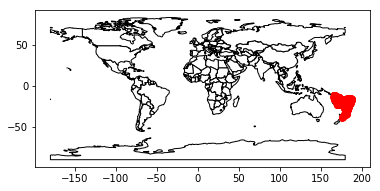

In [154]:
import matplotlib.pyplot as plt
import descartes
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()

In [155]:
gdf.bounds

,minx,miny,maxx,maxy
0,181.62,-20.42,181.62,-20.42
1,181.03,-20.62,181.03,-20.62
2,184.10,-26.00,184.10,-26.00
3,181.66,-17.97,181.66,-17.97
4,181.96,-20.42,181.96,-20.42
5,184.31,-19.68,184.31,-19.68
6,166.10,-11.70,166.10,-11.70
7,181.93,-28.11,181.93,-28.11
8,181.74,-28.74,181.74,-28.74
9,179.59,-17.47,179.59,-17.47


In [156]:
g = gpd.GeoSeries(gdf['Coordinates'])

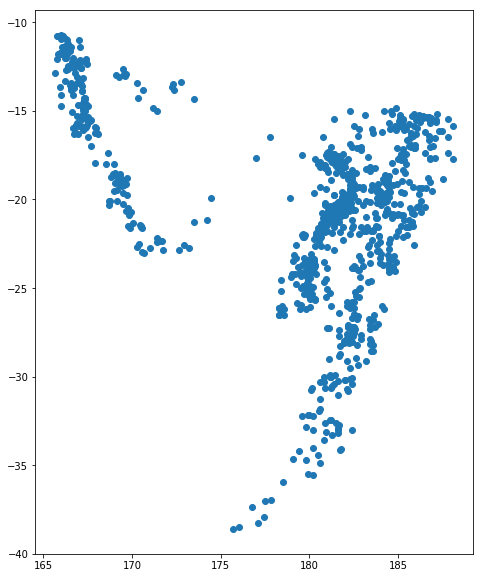

In [157]:
g.convex_hull.plot(figsize=(10,10));

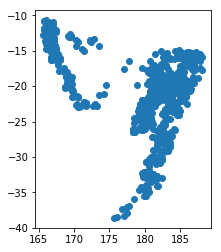

In [158]:
g.envelope.plot()

In [159]:
g.total_bounds

array([ 165.67,  -38.59,  188.13,  -10.72])

In [160]:
import shapely.geometry as geometry
point_collection = geometry.MultiPoint(list(g))

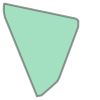

In [161]:
point_collection.convex_hull

In [162]:
from scipy.spatial import Voronoi, voronoi_plot_2d
df_points = df[['long', 'lat']].values

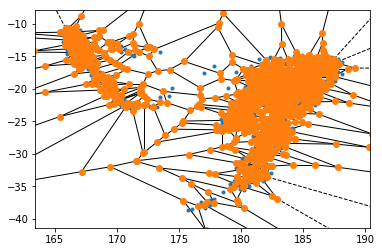

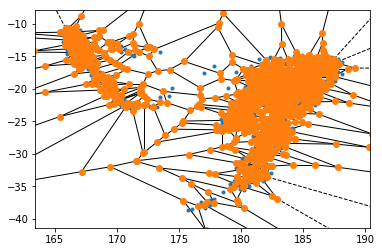

In [163]:
voronoi = Voronoi(df_points)
voronoi_plot_2d(voronoi)

In [164]:
df_vertices = pd.DataFrame(voronoi.vertices)
df_vertices.columns = ['v_long', 'v_lat']
long_min = df['long'].min()
long_max = df['long'].max()
lat_min = df['lat'].min()
lat_max = df['lat'].max()
df_vertices = df_vertices[df_vertices.v_lat < lat_max]
df_vertices = df_vertices[df_vertices.v_lat > lat_min]
df_vertices = df_vertices[df_vertices.v_long < long_max]
df_vertices = df_vertices[df_vertices.v_long > long_min]

In [165]:
df_vertices['Coordinates'] = list(zip(df_vertices.v_long, df_vertices.v_lat))
df_vertices['Coordinates'] = df_vertices['Coordinates'].apply(Point)

In [166]:
df_vertices_gs = gpd.GeoSeries(df_vertices['Coordinates'])

In [167]:
df_vertices_gs.distance(g).idxmax()

21

In [168]:
list(df_vertices_gs[21].coords)

[(176.49938281780277, -37.97994230582759)]

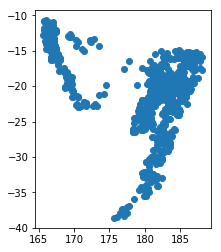

In [169]:
g[1000] = df_vertices_gs[21]
g.plot()